In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import arange

In [92]:
alunos_url16 = 'https://goo.gl/g1sZVa'
alunos16 = pd.read_csv(alunos_url16, sep = ';')

alunos_url15 = 'https://goo.gl/qM1kWH'
alunos15 = pd.read_csv(alunos_url15, sep = ';')

alunos_url14 = 'https://goo.gl/ymRDkb'
alunos14 = pd.read_csv(alunos_url14, sep = ';')

matriculas_url = 'https://bit.ly/2G01rYd'
matriculas = pd.read_csv(matriculas_url, sep = ';')

dados_socioEc_url = 'https://bit.ly/2I5xrMA'
dados_socioec = pd.read_csv(dados_socioEc_url, sep = ';')

cursos_url = 'https://bit.ly/2rwgfc4'
cursos = pd.read_csv(cursos_url, sep = ";")

In [4]:
alunos_concat = pd.concat([alunos16, alunos15, alunos14])
alunos_concat.dropna(inplace = True)
alunos_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53471 entries, 0 to 20602
Data columns (total 16 columns):
matricula               53471 non-null int64
nome_discente           53471 non-null object
ano_ingresso            53471 non-null int64
periodo_ingresso        53471 non-null float64
forma_ingresso          53471 non-null object
tipo_discente           53471 non-null object
status                  53471 non-null object
sigla_nivel_ensino      53471 non-null object
nivel_ensino            53471 non-null object
id_curso                53471 non-null float64
nome_curso              53471 non-null object
modalidade_educacao     53471 non-null object
id_unidade              53471 non-null float64
nome_unidade            53471 non-null object
id_unidade_gestora      53471 non-null float64
nome_unidade_gestora    53471 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 6.9+ MB


In [5]:
alunosBTI = alunos_concat[alunos_concat.nome_curso == "TECNOLOGIA DA INFORMAÇÃO"]
alunosCET = alunos_concat[alunos_concat.nome_curso == "CIÊNCIAS E TECNOLOGIA"]

alunosBTI = alunosBTI[~alunosBTI.nome_discente.duplicated()]
alunosCET = alunosCET[~alunosCET.nome_discente.duplicated()]

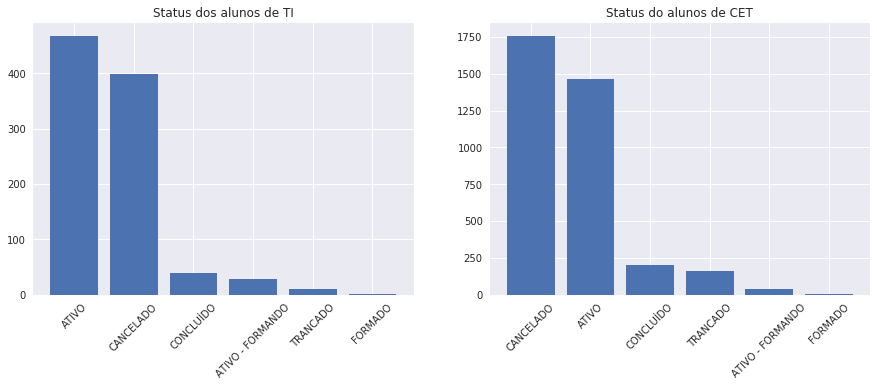

In [82]:
num_alunosBTI = alunosBTI.matricula.count()
statusBTI = alunosBTI.status.value_counts()
nome_statusBTI = alunosBTI.status[~alunosBTI.status.duplicated()]

num_alunosCET = alunosCET.matricula.count()
statusCET = alunosCET.status.value_counts()
nome_statusCET = alunosCET.status[~alunosCET.status.duplicated()]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Status dos alunos de TI")
bar_position = arange(6)
ax1.bar(bar_position, statusBTI)
ax1.set_xticklabels(nome_statusBTI , rotation = 45)
ax1.set_xticks(range(0,6))

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Status do alunos de CET")
ax2.bar(bar_position, statusCET)
ax2.set_xticklabels(nome_statusCET, rotation = 45)
ax2.set_xticks(range(0,6))
plt.show()

limpando tabelas MATRICULA e DADOS SOCIOECONOMICOS

In [42]:
#matriculas.dropna(inplace=True)
matric_clear = matriculas[~matriculas.discente.duplicated()]
discentes_m = matric_clear.discente
len(discentes_m)

33682

In [43]:
#dados_socioec.dropna(inplace=True)
dados_socioec_clear = dados_socioec[~dados_socioec.id_discente.duplicated()]
discentes_s = dados_socioec_clear.id_discente
len(discentes_s)

10645

Pegando os discentes iguais nas tabelas

In [79]:
iguais = []
for i in discentes_m:
    for j in discentes_s:
        if i==j:
            iguais.append(j)
len(iguais)

5024

gerando lista com as rows dos discentes iguais na tabela matricula

In [167]:
lista_id_cursos = []
for i in iguais:
    lista_id_cursos.append(matric_clear[matric_clear.discente == i])v

percorendo a lista e pegando os id_curso de cada row

In [156]:
size = len(lista)
lista_cursos = []
for i in range(0, size):
    lista_cursos.append(lista[i]['id_curso'].values[0].astype(int))

gerando lista com as rows dos id_cursos iguais na tabela cursos

In [243]:
#cursos[cursos.id_curso == lista_cursos[4]]
lista_nome_cursos = []
for i in lista_cursos:
    lista_nome_cursos.append(cursos[cursos.id_curso == i])

percorendo a lista e pegando os nomes dos cursos de cada row

In [244]:
nomes=[]
size = len(lista_nome_cursos)
for i in range(0,size):
    nomes.append(lista_nome_cursos[i]['nome'].values)

In [245]:
nomes2 = []
for i in range(0,size):
    if len(lista_nome_cursos[i]['nome'].values) > 0:
        nomes2.append(lista_nome_cursos[i]['nome'].values[0])

In [247]:
nomes_dict = {}
nomes_dict['nomes'] = nomes2
nomes_curso = pd.DataFrame(data=nomes_dict)
nomes_curso.head()

,nomes
0,QUÍMICA
1,ENGENHARIA QUÍMICA
2,MEDICINA
3,MEDICINA
4,MEDICINA
